In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("S02-hw-dataset.csv")

df.head(6)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [91]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [92]:
for column in df.columns:
    print(f"Для {column} доля пропусков: {df[column].isna().sum()/len(df[column])}")

Для user_id доля пропусков: 0.0
Для age доля пропусков: 0.04878048780487805
Для country доля пропусков: 0.0
Для purchases доля пропусков: 0.0
Для revenue доля пропусков: 0.0


In [93]:
print(f"Число дублированных строк: {int(df.duplicated().sum())}")

Число дублированных строк: 1


<Axes: >

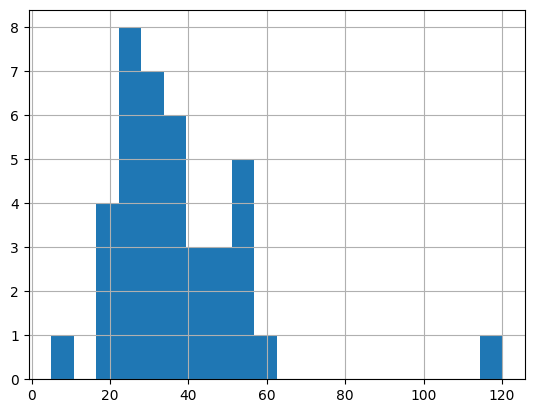

In [94]:
df["age"].hist(bins=20)

Как видим в датасете преобладают данные с возрастом 20-40 лет, а также наблюдается какой-то небольшой скачок в 50-55 лет

In [95]:
index_for_delete = df[df["age"]>100].index
df=df.drop(index_for_delete)

Была обнаружена строка с индексом 5, где у человека было 120 лет и -1 количество покупок. Эти данные были удалены по логическим соображениям

In [96]:
df["purchases"].value_counts()

purchases
7     8
6     8
3     5
5     4
4     4
2     3
0     3
9     2
8     1
11    1
1     1
Name: count, dtype: int64

Как показано на ячейке выше чаще всеог люди совершают 7-6 покупок

In [97]:
df.groupby("country")["revenue"].mean().sort_values(ascending=False)

country
DE    1445.500000
CN    1054.000000
RU     790.076923
FR     666.000000
US     557.375000
Name: revenue, dtype: float64

По сумме покупок больше всего преобладает Германия и Китай, на последнем месте США

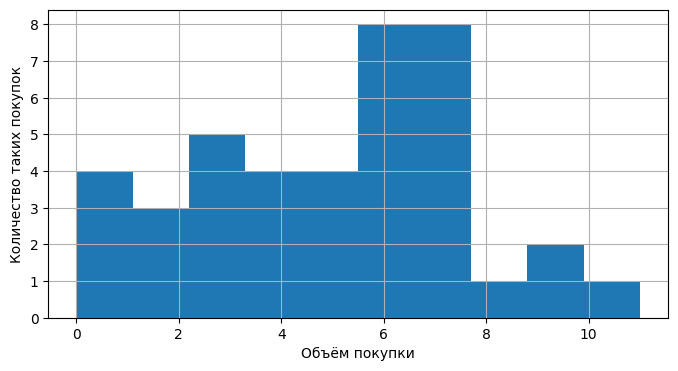

In [98]:
fig, ax  = plt.subplots(figsize=(8,4))
plt.hist(df["purchases"])

ax.set_xlabel("Объём покупки")
ax.set_ylabel("Количество таких покупок")
plt.grid()

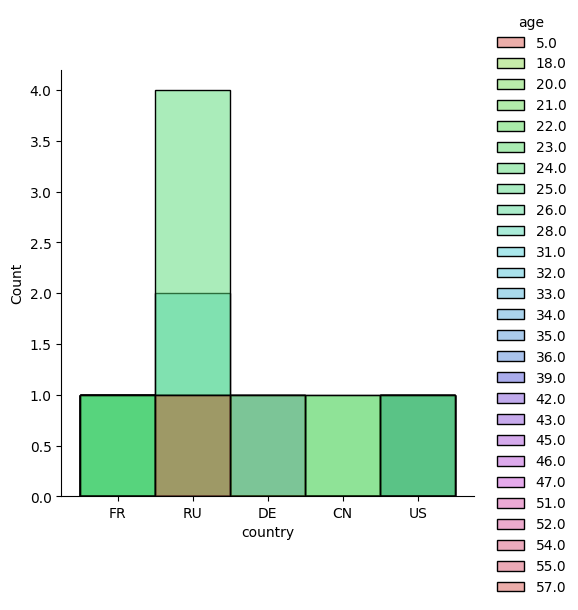

In [139]:
sns.displot(df, x="country", hue="age", palette="hls")
plt.savefig("figures/Графичек.png")

<Axes: xlabel='purchases', ylabel='country'>

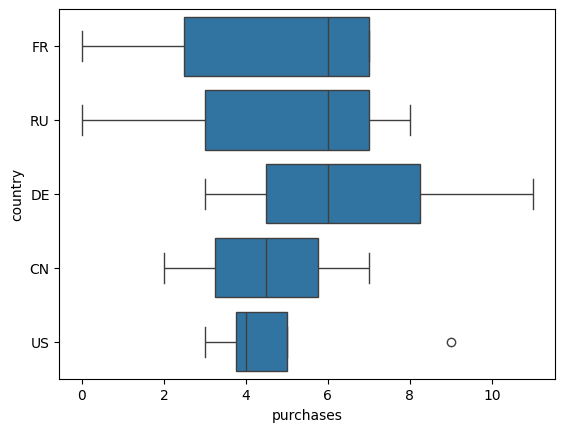

In [ ]:
top_counties = df.country.value_counts().sort_values(ascending=False).index.values
sns.boxplot(y = "country",x = "purchases",data =df[df.country.isin(top_counties)], orient="h")

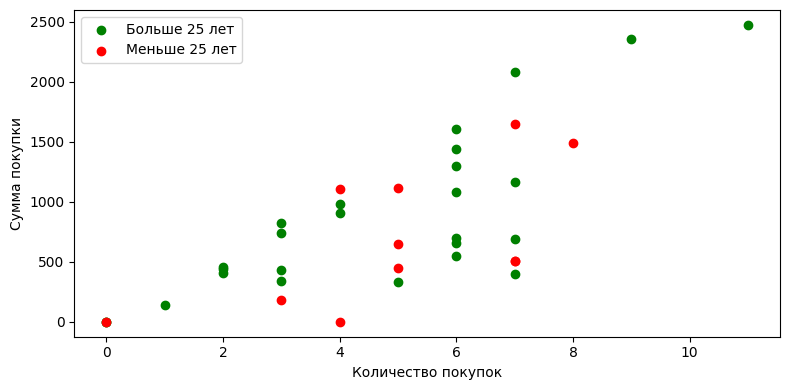

In [ ]:
fig, ax =plt.subplots(figsize=(8,4))
df1 = df[df["age"]>25]
df2=df[df["age"]<25]

ax.scatter(x = df1["purchases"], y = df1["revenue"],color = "green",label = "Больше 25 лет")
ax.scatter(x = df2["purchases"], y = df2["revenue"],color = "red", label = "Меньше 25 лет")
ax.set_xlabel("Количество покупок")
ax.set_ylabel("Сумма покупки")
ax.legend()
fig.tight_layout()